In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Resolution: Increase 'res' for smoother plots (150-200)
res = 120
x = np.linspace(-3, 3, res)
y = np.linspace(-3, 3, res)
X, Y = np.meshgrid(x, y)

# Styling Constants
MILK_BG = "#FFFDD0"
TEXT_COLOR = "#1a1a1a"

In [7]:
def huber_loss_3d(x, y, delta=1.0):
    def h(v):
        return np.where(np.abs(v) <= delta, 0.5 * v**2, delta * (np.abs(v) - 0.5 * delta))
    return h(x) + h(y)

# Calculating Surfaces
mse = X**2 + Y**2
mae = np.abs(X) + np.abs(Y)
huber = huber_loss_3d(X, Y)
hinge = np.maximum(0, 1 - X) + np.maximum(0, 1 - Y)
log_loss = np.log(1 + np.exp(-X)) + np.log(1 + np.exp(-Y))

losses = [
    ("Mean Squared Error (MSE)", mse),
    ("Mean Absolute Error (MAE)", mae),
    ("Huber Loss", huber),
    ("Hinge Loss", hinge),
    ("Log Loss", log_loss)
]

In [8]:
fig = plt.figure(figsize=(20, 14), dpi=300)
fig.patch.set_facecolor(MILK_BG)

<Figure size 6000x4200 with 0 Axes>

In [9]:
for i, (name, Z) in enumerate(losses, 1):
    ax = fig.add_subplot(2, 3, i, projection='3d')
    ax.set_facecolor(MILK_BG)
    
    # Plotting surface
    surf = ax.plot_surface(X, Y, Z, cmap='winter', edgecolor='none', alpha=0.9, antialiased=True)
    
    # Bold Text Styling
    ax.set_title(name, fontsize=20, fontweight='bold', color=TEXT_COLOR, pad=25)
    ax.set_xlabel('$w_1$', fontsize=14, fontweight='bold', color=TEXT_COLOR, labelpad=10)
    ax.set_ylabel('$w_2$', fontsize=14, fontweight='bold', color=TEXT_COLOR, labelpad=10)
    ax.set_zlabel('Loss', fontsize=14, fontweight='bold', color=TEXT_COLOR, labelpad=10)
    
    # Clean up 3D environment
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.tick_params(axis='both', which='major', labelsize=10, colors='#333333')
    
    # Rotation for visibility
    if "Hinge" in name or "Log" in name:
        ax.view_init(elev=25, azim=135)
    else:
        ax.view_init(elev=25, azim=45)

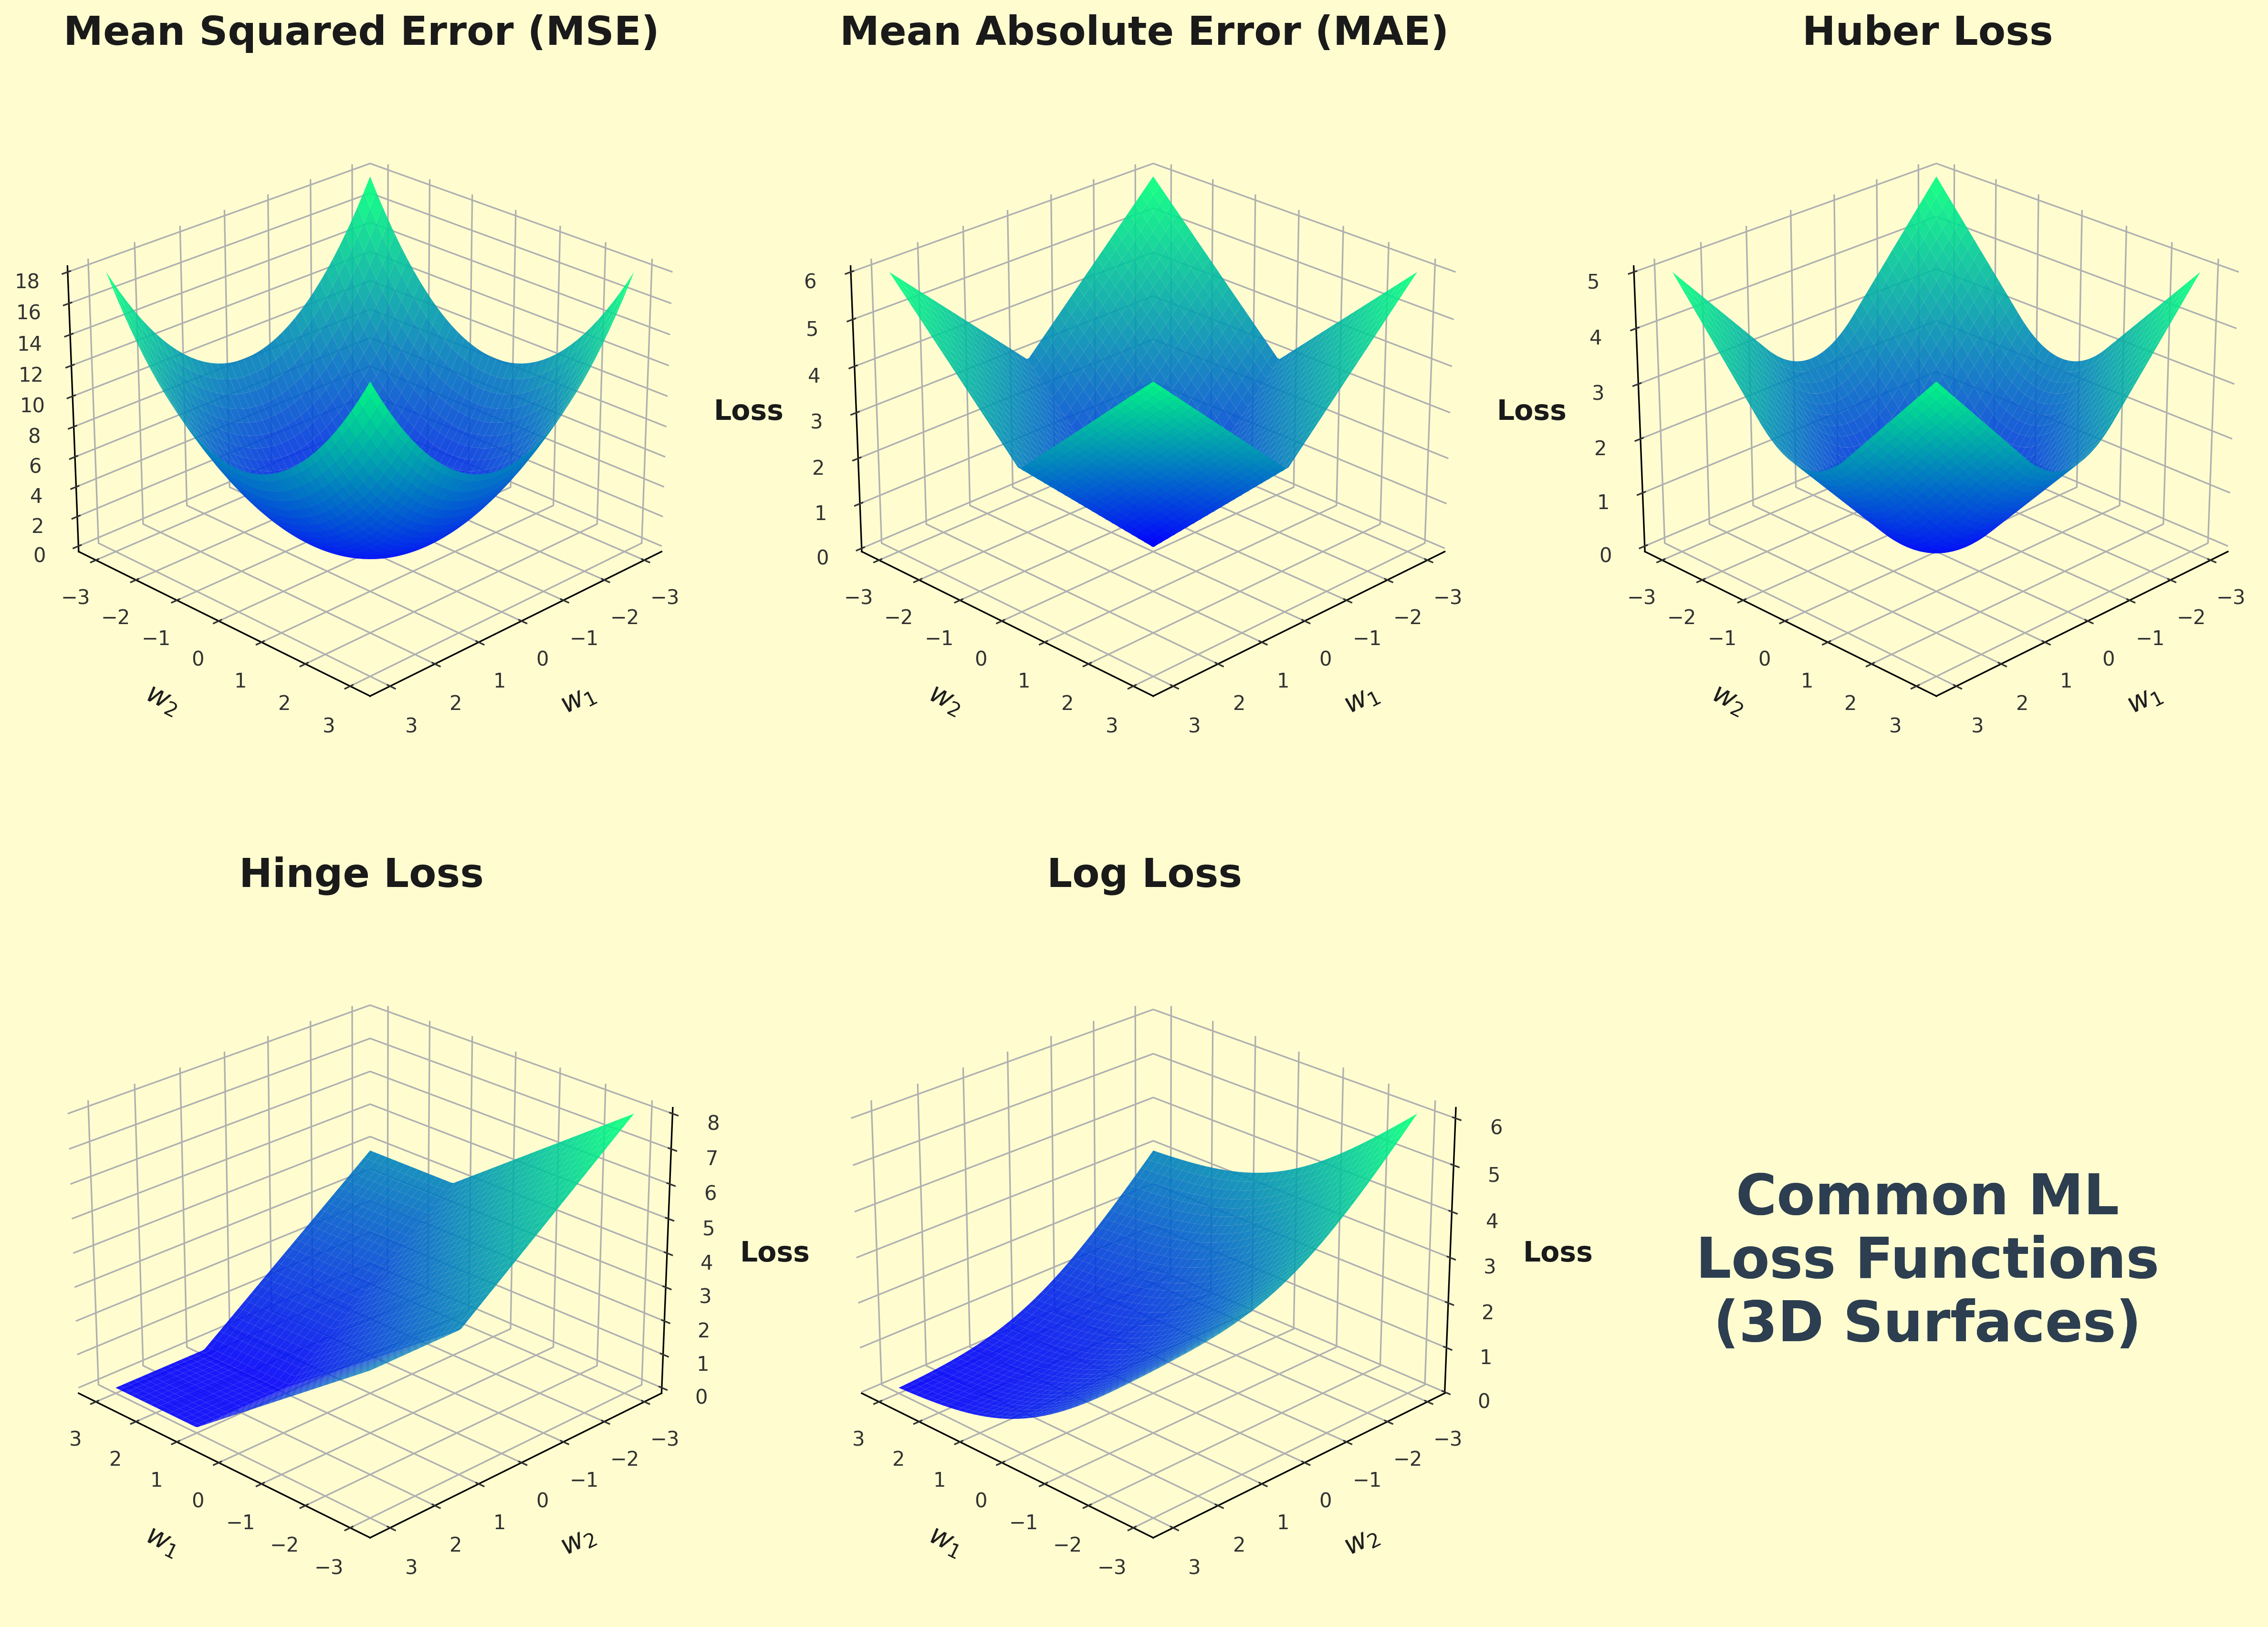

In [11]:
# Create the Infographic Header in the final empty slot
ax_text = fig.add_subplot(2, 3, 6)
ax_text.axis('off')
ax_text.text(0.5, 0.5, "Common ML\nLoss Functions\n(3D Surfaces)", 
             horizontalalignment='center', verticalalignment='center',
             fontsize=28, fontweight='extra bold', color='#2c3e50')

# plt.tight_layout(pad=4.0)
fig.savefig('plots/loss_functions_high_res.png', facecolor=fig.get_facecolor(), bbox_inches='tight')

plt.show()
fig